# STAT207 Final Project:
# Analyzing Popular Movies & TV Shows on Netflix and Amazon Prime Video

**Group Members: Megha Rao (mkrao2), Kavya Moharana (kavyam3)**

**Lab Section YK**

## 1. Introduction

### Motivation behind the Analysis:

Our main motivation behind exploring this dataset would be the popularity and widespread use of Netflix and Amazon Prime Video as the top 2 streaming platforms for movies and television. We both love using these platforms for binging TV shows or movies and believe that analyzing such data would be helpful to us and others with similar hobbies.

Ultimately we would like to determine if either streaming platform contained certain movies/shows with higher ratings and if the ratings differ based on genre or year of release.

### Research Questions:

In this report we will be analyzing the data to answer the following research questions
1. How does the relationship between genre and the year it came out affect the overall Rotten Tomatoes rating of the movie?
2. Is there an association between Action and Adventure titles and higher rated Rotten Tomato scores from the population of popular movies and tv shows on Netflix and Amazon Prime Video?
3. Is there a linear relationship between the Rotten Tomatoes rating of a movie and the year it was released, the age rating, and whether the movie is on Netflix or Amazon Prime Video?
4. Can we predict whether a movie is available on Netflix based on its age rating, genre, Rotten Tomatoes score, and IMDb rating?

Answering these questions could allow for movie/show critics and reviewers to use this information to analyze trends and patterns in the movie industry. It could also possibly help filmmakers and studios make decisions about what genres to focus on in order to produce higher rated movies. Analyzing the variables that affect Rotten Tomatoes scores can also provide insights into what factors contribute to what the website considers to be a successful movie or tv show.

### The Dataset:

In [26]:
#Imports here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from scipy.stats import norm
from scipy.stats import t
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
df = pd.read_csv("netflix_amazon.csv", na_values=["na"])
df.head(6)

,Unnamed: 0,ID,Title,Year,Rating,IMDb,Rotten Tomatoes,Genre,Netflix,Amazon Prime Video
0,0,1,Terminator: Dark Fate,2019,18+,6.2,81.0,Action & Adventure,0,1
1,1,2,Gemini Man,2019,13+,5.7,74.0,Action & Adventure,0,1
2,2,3,Rambo: Last Blood,2019,18+,6.1,72.0,Action & Adventure,0,1
3,3,4,The Courier,2019,18+,4.9,50.0,Action & Adventure,0,1
4,4,5,Crawl,2019,18+,6.1,79.0,Action & Adventure,0,1
5,5,6,The Kill Team,2019,18+,5.9,61.0,Action & Adventure,0,1


In [3]:
print("Rows and Columns:", df.shape)

Rows and Columns: (24664, 10)


### Details & Limitations of the Dataset:
This dataset is from Kaggle and presents a collection of popular movies and TV shows on both Netflix and Amazon Prime. The dataframe contains 10 columns and 24664 rows before cleaning for missing values and other factors. Currently, the data includes titles from 1912 all the way to 2021 but we would like to focus in on the programs from the most recent decade of 2011 to 2021.

There are some limitations to the data as it does not include any variables which allow for us to differentiate between TV shows and movies in the dataset. Therefore, we have chosen to look at both of these forms of media hollistically instead of differentiating between the two.

### Data Cleaning
In this section we clean the dataset for missing values, make sure each variable is of the correct datatype, adjust the data to only be from 2011 to 2021, change the names of variables to be more clear, and remove the '+' symbol from the Age Rating column. 

In [4]:
# looking for unique values
print(df.Rating.unique())
print(df["Rotten Tomatoes"].unique())
print(df["IMDb"].unique())
print(df["Genre"].unique())

['18+' '13+' nan '7+' '16+' 'all']
[81. 74. 72. 50. 79. 61. 63. 39. 94. 49. 55. 73. 47. 84. 51. 59. 90. 64.
 44. 54. 53. 42. 41. 85. 86. 48. 57. 56. 32. 80. 38. 70. 40. 66. 65. 75.
 31. 43. 76. 71. 69. 36. 58. 62. 78. 25. 34. 46. 67. 68. 77. 45. 60. 52.
 37. 83. 35. 33. 28. 23. 24. 30. 22. 29. 27. 26. 88. 87. 93. 82. 14. 20.
 21. 13. 92. nan 18. 19. 16. 12. 10. 17. 15. 91. 89.]
['6.2' '5.7' '6.1' '4.9' '5.9' '5.3' '3.1' '8.0' '4.4' '6.8' '5.0' '6.6'
 '7.6' '3.5' '5.2' '4.1' '7.7' '7.0' '6.5' '3.9' '7.3' '3.8' '6.4' '5.8'
 '4.2' '7.2' '4.6' '7.9' '6.7' '4.5' '5.6' '4.8' '6.0' '7.8' '6.9' '4.7'
 '7.1' '3.6' '7.5' '7.4' '1.9' '5.5' '5.1' '6.3' '3.7' '5.4' nan '8.3'
 '8.6' '4.3' '8.2' '8.1' '2.7' '4.0' '2.5' '2.4' '2.2' '3.3' '2.8' '3.2'
 '2.9' '2.3' '3.4' '3.0' '1.8' '2.6' '8.4' '8.5' '2.0' '8.7' '1.7' '1.5'
 '1.6' '2.1' '8.9' 'd;}' '8.8' '9.8' '1.3' '1.4' '9.6' '9.2' '9.0' '9.3'
 '1.0' '0.0' '9.1' '1.1']
['Action & Adventure' 'Animation' 'Biography' 'Comedy' 'Crime'
 'Documentary' 'Drama

In [5]:
# dropping NA values
df = df.dropna()
df

,Unnamed: 0,ID,Title,Year,Rating,IMDb,Rotten Tomatoes,Genre,Netflix,Amazon Prime Video
0,0,1,Terminator: Dark Fate,2019,18+,6.2,81.0,Action & Adventure,0,1
1,1,2,Gemini Man,2019,13+,5.7,74.0,Action & Adventure,0,1
2,2,3,Rambo: Last Blood,2019,18+,6.1,72.0,Action & Adventure,0,1
3,3,4,The Courier,2019,18+,4.9,50.0,Action & Adventure,0,1
4,4,5,Crawl,2019,18+,6.1,79.0,Action & Adventure,0,1
...,...,...,...,...,...,...,...,...,...,...
24602,24602,24603,Needhi Singh,2016,7+,6.2,31.0,Drama,1,0
24611,24611,24612,Khido Khundi,2018,7+,6.5,42.0,Drama,1,0
24627,24627,24628,Hajwala: The Missing Engine,2016,13+,2.1,29.0,Drama,1,0
24654,24654,24655,S Storm,2016,13+,5.2,29.0,Drama,1,0


In [6]:
# checking datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9993 entries, 0 to 24655
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          9993 non-null   int64  
 1   ID                  9993 non-null   int64  
 2   Title               9993 non-null   object 
 3   Year                9993 non-null   int64  
 4   Rating              9993 non-null   object 
 5   IMDb                9993 non-null   object 
 6   Rotten Tomatoes     9993 non-null   float64
 7   Genre               9993 non-null   object 
 8   Netflix             9993 non-null   int64  
 9   Amazon Prime Video  9993 non-null   int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 858.8+ KB


In [7]:
df['IMDb'] = df['IMDb'].astype(float)
df['IMDb'].dtype

dtype('float64')

In [8]:
# adjusting the data to be from 2011 to 2021
df = df[ (df["Year"] >= 2011) ]
df["Year"].value_counts()

2017    715
2018    578
2016    558
2014    535
2015    523
2013    471
2012    432
2019    395
2011    376
2020    228
2021      4
Name: Year, dtype: int64

In [9]:
# renaming variables
df = df.rename(columns={'Rotten Tomatoes': 'Rotten_Tomatoes', 'Amazon Prime Video': 'Prime_Video', 'Rating': 'Age_Rating'})
df

,Unnamed: 0,ID,Title,Year,Age_Rating,IMDb,Rotten_Tomatoes,Genre,Netflix,Prime_Video
0,0,1,Terminator: Dark Fate,2019,18+,6.2,81.0,Action & Adventure,0,1
1,1,2,Gemini Man,2019,13+,5.7,74.0,Action & Adventure,0,1
2,2,3,Rambo: Last Blood,2019,18+,6.1,72.0,Action & Adventure,0,1
3,3,4,The Courier,2019,18+,4.9,50.0,Action & Adventure,0,1
4,4,5,Crawl,2019,18+,6.1,79.0,Action & Adventure,0,1
...,...,...,...,...,...,...,...,...,...,...
24602,24602,24603,Needhi Singh,2016,7+,6.2,31.0,Drama,1,0
24611,24611,24612,Khido Khundi,2018,7+,6.5,42.0,Drama,1,0
24627,24627,24628,Hajwala: The Missing Engine,2016,13+,2.1,29.0,Drama,1,0
24654,24654,24655,S Storm,2016,13+,5.2,29.0,Drama,1,0


In [10]:
# removing '+' symbol from Age Rating column
df['Age_Rating'] = df['Age_Rating'].str.replace('+', '', regex=False)
df['Age_Rating'].value_counts()

18     2039
13     1014
7       922
all     421
16      419
Name: Age_Rating, dtype: int64

**After data cleaning the dataset contains 4815 rows and 10 columns.**

## 2. Descriptive Analytics

*In this section we will be exploring the following research question:*

**How does the relationship between genre and the year it came out affect the overall Rotten Tomatoes rating of the movie?**

First, we'll filter the data to only look at the top 5 movie genres with the most observations in the dataset: Drama, Action & Adventure, Comedy, Crime, and Horror.

In [11]:
top5 = ['Drama', 'Action & Adventure', 'Comedy', 'Crime', 'Horror']
df2 = df[df['Genre'].isin(top5)]
df2

,Unnamed: 0,ID,Title,Year,Age_Rating,IMDb,Rotten_Tomatoes,Genre,Netflix,Prime_Video
0,0,1,Terminator: Dark Fate,2019,18,6.2,81.0,Action & Adventure,0,1
1,1,2,Gemini Man,2019,13,5.7,74.0,Action & Adventure,0,1
2,2,3,Rambo: Last Blood,2019,18,6.1,72.0,Action & Adventure,0,1
3,3,4,The Courier,2019,18,4.9,50.0,Action & Adventure,0,1
4,4,5,Crawl,2019,18,6.1,79.0,Action & Adventure,0,1
...,...,...,...,...,...,...,...,...,...,...
24602,24602,24603,Needhi Singh,2016,7,6.2,31.0,Drama,1,0
24611,24611,24612,Khido Khundi,2018,7,6.5,42.0,Drama,1,0
24627,24627,24628,Hajwala: The Missing Engine,2016,13,2.1,29.0,Drama,1,0
24654,24654,24655,S Storm,2016,13,5.2,29.0,Drama,1,0


**We can visualize the relationship between the top 5 movie genres and their average Rotten Tomatoes rating per year through a bar graph and scatterplot.**

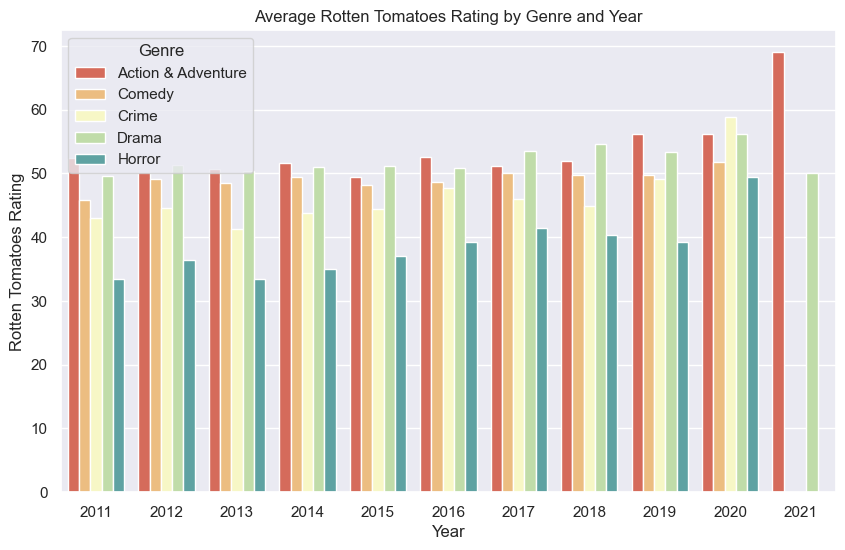

In [12]:
my_palette = sns.color_palette("Spectral", len(df2['Genre'].unique()))
fig, ax = plt.subplots(figsize=(10, 6))

sns.barplot(x='Year', y='Rotten_Tomatoes', hue='Genre', data=df2, errorbar=None, palette=my_palette, ax=ax)
plt.xlabel('Year')
plt.ylabel('Rotten Tomatoes Rating')
plt.title('Average Rotten Tomatoes Rating by Genre and Year')
plt.legend(title='Genre')

Text(0.5, 1.0, 'Average Rotten Tomatoes Score by Genre and Year')

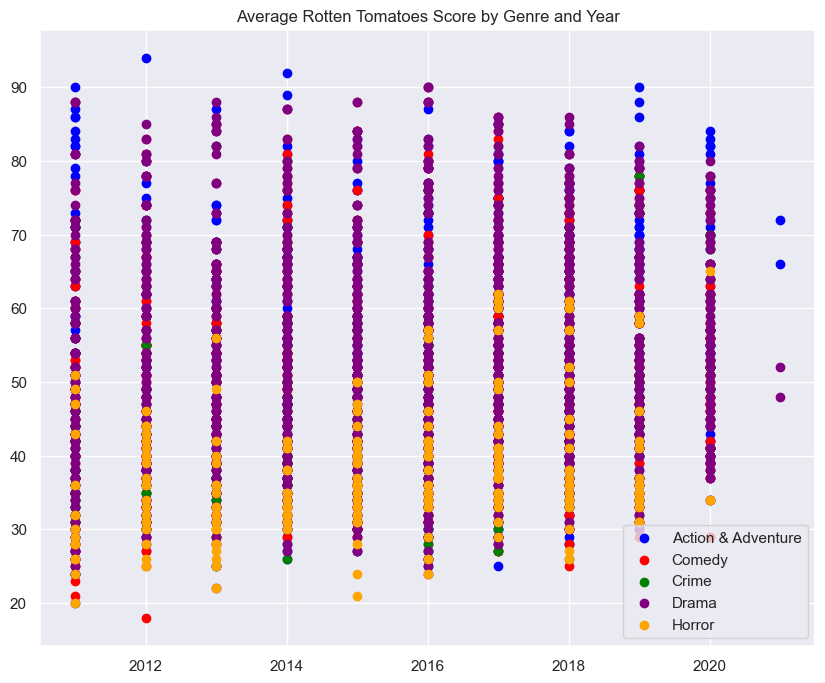

In [13]:
plt.figure(figsize=(10, 8))
colors = ['blue', 'red', 'green', 'purple', 'orange']
for i, genre in enumerate(df2['Genre'].unique()):
    plt.scatter(df2[df2['Genre'] == genre]['Year'], df2[df2['Genre'] == genre]['Rotten_Tomatoes'], color=colors[i%6], label=genre)
plt.legend()
plt.title('Average Rotten Tomatoes Score by Genre and Year')

**Summary Statistics:**

In [14]:
RT_mean = df2.groupby('Genre')['Rotten_Tomatoes'].mean()
RT_std = df2.groupby('Genre')['Rotten_Tomatoes'].std()
RT_med = df2.groupby('Genre')['Rotten_Tomatoes'].median()
print('Mean Rotten Tomatoes rating by genre:\n', RT_mean)
print('\nStandard Deviation of Rotten Tomatoes rating by genre:\n', RT_std)
print('\nMedian Rotten Tomatoes rating by genre:\n', RT_med)

Mean Rotten Tomatoes rating by genre:
 Genre
Action & Adventure    52.212632
Comedy                49.147556
Crime                 45.448276
Drama                 52.085569
Horror                37.675532
Name: Rotten_Tomatoes, dtype: float64

Standard Deviation of Rotten Tomatoes rating by genre:
 Genre
Action & Adventure    15.359172
Comedy                13.412405
Crime                 12.968390
Drama                 13.640893
Horror                 8.724913
Name: Rotten_Tomatoes, dtype: float64

Median Rotten Tomatoes rating by genre:
 Genre
Action & Adventure    51.0
Comedy                47.0
Crime                 42.0
Drama                 51.0
Horror                36.0
Name: Rotten_Tomatoes, dtype: float64


In [15]:
mean2 = df2.groupby('Year')['Rotten_Tomatoes'].mean()
mean2

Year
2011    48.063758
2012    49.000000
2013    48.330409
2014    49.590909
2015    48.660194
2016    49.897092
2017    50.917710
2018    51.393004
2019    52.373457
2020    54.762626
2021    59.500000
Name: Rotten_Tomatoes, dtype: float64

In [16]:
med2 = df2.groupby('Year')['Rotten_Tomatoes'].median()
med2

Year
2011    46.0
2012    46.0
2013    46.0
2014    47.0
2015    46.0
2016    47.0
2017    49.0
2018    49.0
2019    51.0
2020    53.0
2021    59.0
Name: Rotten_Tomatoes, dtype: float64

In [17]:
std2 = df2.groupby('Year')['Rotten_Tomatoes'].std()
std2

Year
2011    16.036132
2012    14.564883
2013    14.299033
2014    13.914525
2015    13.605533
2016    14.700696
2017    13.786273
2018    13.581972
2019    13.992458
2020    12.523246
2021    11.357817
Name: Rotten_Tomatoes, dtype: float64

From the visualizations and summary statistics we can see that out of the top 5 genres in the dataset, Action & Adventure and Drama seem to have consistently higher average Rotten Tomatoes scores (as well as standard deviation and median) while genres like horror are rated consistently lower. The median Rotten Tomatoes score by year from 2011 to 2021 has also seen a steady increase from around 46 to 59. Based on this, it is possible that there is an association between genre of the program, year of release and the Rotten Tomatoes score

## 3. Inference

*In this section we will be exploring the following research question regarding linear regression:*

**Is there an association between Action and Adventure titles and higher rated Rotten Tomato scores from the population of popular movies and tv shows on Netflix and Amazon Prime Video?**

In [18]:
high = df[df["Rotten_Tomatoes"] > 75]
low = df[df["Rotten_Tomatoes"] < 75]

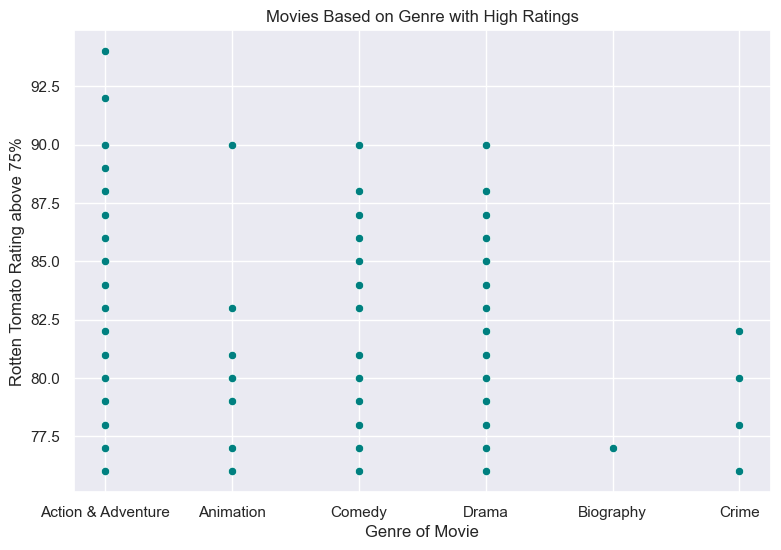

In [19]:
# visualizing the top 25% of Rotten Tomatoes scores 
fig, ax = plt.subplots(figsize=(9,6))
sns.scatterplot(x='Genre', y='Rotten_Tomatoes', data=high, color='teal')
plt.xlabel('Genre of Movie')
plt.ylabel('Rotten Tomato Rating above 75%')
plt.title("Movies Based on Genre with High Ratings")
plt.show()

In [20]:
dfaa = df[df["Genre"] == "Action & Adventure"]
print(dfaa.mean())
print("Shape:", dfaa.shape)

Unnamed: 0         13828.534737
ID                 13829.534737
Year                2015.688421
IMDb                   5.562105
Rotten_Tomatoes       52.212632
Netflix                0.386316
Prime_Video            0.613684
dtype: float64
Shape: (950, 10)


/var/folders/j9/15ld47k16mz97j49j3_d0tgw0000gn/T/ipykernel_90833/3852053552.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(dfaa.mean())


In [21]:
dfaa_sample = dfaa.sample(100)
dfaa_sample = dfaa_sample['Rotten_Tomatoes']
dfaa_sample

2822     52.0
7517     40.0
22805    47.0
13       84.0
21789    82.0
         ... 
22900    41.0
10660    26.0
21261    81.0
23010    55.0
18756    44.0
Name: Rotten_Tomatoes, Length: 100, dtype: float64

In [22]:
df_other = df[df["Genre"] != "Action & Adventure"]
dfo_sample = df_other.sample(100)
dfo_sample = dfo_sample['Rotten_Tomatoes']
dfo_sample

21930    56.0
12209    37.0
7812     35.0
15320    38.0
16272    55.0
         ... 
8358     36.0
12668    29.0
18515    31.0
22534    72.0
23629    48.0
Name: Rotten_Tomatoes, Length: 100, dtype: float64

### Hypothesis Testing:

$H_0$: There is no association between Action and Adventure titles and higher rated Rotten Tomato scores from the population of popular movies and tv shows on Netflix and Amazon Prime Video.

$H_a$: There is a positive association between Action and Adventure titles and higher rated Rotten Tomato scores from the population of popular movies and tv shows on Netflix and Amazon Prime Video.

### Conditions  & Confidence Intervals:

Condition 1: The obervations are independent. Assume independence since sample of popular movies on these platforms. n < 10% of all the movies and tv shows shown on Netflix and Amazon Prime

Condition 2: Normality. The distribution of Rotten Tomato ratings for Action and Adventure are not normal but n = 950 and n > 30, so this condition is met. 

In [23]:
alpha = 0.05
crt_val = norm.ppf(1-alpha/2)
crt_val

1.959963984540054

We could also use a z-score table. We wanted to calculate a 95% confidence interval and z-score formula is (wanted - mean)/standard deviation. This would also give the z-score of ~1.95. 

In [24]:
# Confidence Interval - Action & Adventure
sample_mean_rating = dfaa_sample.mean()
sample_std_rating = dfaa_sample.std()
n_rating = dfaa_sample.shape[0]

low_bound = sample_mean_rating - crt_val*(sample_std_rating/np.sqrt(n_rating))
up_bound = sample_mean_rating + crt_val*(sample_std_rating/np.sqrt(n_rating))
print(low_bound, ",", up_bound)

NameError: name 'np' is not defined

In [ ]:
# Confidence Interval - Other Genres (conditions are same as other, have been checked)
sample_mean_rating2 = dfo_sample.mean()
sample_std_rating2 = dfo_sample.std()
n_rating2 = dfo_sample.shape[0]

low_bound2 = sample_mean_rating2 - crt_val*(sample_std_rating2/np.sqrt(n_rating2))
up_bound2 = sample_mean_rating2 + crt_val*(sample_std_rating2/np.sqrt(n_rating2))
print(low_bound2, ",", up_bound2)

*Interpretations:*

We are 95% confident that the Rotten Tomato score for Action and Adventure titles would be within the internal (47.5542-53.5457).

We are 95% confident that the Rotten Tomato score for titles with genres other than Action and Adventure would be within the internal (46.1327-51.9273).

This helps us with the research question because we are able to see where most of the Action and Adventure movies are rated on the Rotten Tomato scale. From previous sections we learned that Action and Adventure looked like it was among the higher rated movies and tv shows, if not the highest. This inclined us to look further into that and compare confidence intervals from that genre versus others. 

Based on the two confidence intervals and the fact that they do not overlap, we can conclude that the average Rotten Tomatoes scores of Action and Adventure titles are significantly higher than those of non-Action and Adventure titles. This supports the alternative hypothesis that there is an association between Action and Adventure titles and higher rated Rotten Tomato scores. 

## 4. Linear Regression

*In this section we will be exploring the following research question regarding linear regression:*

**Is there a linear relationship between the Rotten Tomatoes rating of a movie and the year it was released, the age rating, and whether the movie is on Netflix or Amazon Prime Video?**


In [ ]:
dflin = df[["Year", "Age_Rating", "Netflix", "Prime_Video"]]
dflin

In [ ]:
sns.pairplot(dflin)
plt.show()

In [ ]:
dflin.corr()

In [ ]:
dflin.describe()

In [ ]:
results = smf.ols('Rotten_Tomatoes ~  Year + Age_Rating + Netflix + Prime_Video', data=df).fit()
results.summary()

In [ ]:
predicted = (-70.8586) - (4.1233*0) + (0.3267*18) - (1.9304*0) - (6.0555*0) + (0.0785*2012) - (29.7940*0) - (41.0646*1) 
predicted    

In [ ]:
movie = df[df.Title == "Terminator: Dark Fate"]
movie
actual = 81.0 
residual = actual - predicted 
print("Residual:", residual)

**Checking Linear Regression Conditions:**

**Condition 1:**

In [ ]:
sns.regplot(x=results.fittedvalues, y=results.resid, ci=None)
plt.ylabel('Residual')
plt.xlabel('Fitted Value')
plt.show()

The points in the plot are not evenly distributed above and below the line, therefore this condition is not met.

**Condition 2:** The y-axis spread is not even so this condition is also not met.

**Condition 3: Normality of Residuals**

In [ ]:
plt.hist(results.resid)
plt.xlabel('Residuals')
plt.show()

This graph has a slight right-tail which means the data is skewed towards one side. However, it is mostly normal so this condition is slightly met. The mean also seems like it is around 0. 

**Condition 4:**

1) This dataset is randomly sampled among popular movies and TV shows in both Netflix and Amazon Prime video, according to Kaggle

2) Sample size n=4339<10% of all movies and TV shows on Amazon Prime Video and Netflix.

The percent of variability in the response variable is 0.16. This is a low variability. There are also no slopes in this model that have sufficient evidence to suggest they are non-zero. This helps us answer our research question because we can now see where the ratings are between with a confidence interval in the Action and Adventure genre.

This linear regression analysis helped us answer the research question because we were able to see that there is no stuck linear relationship between the year, rating, and which streaming platform it is on whether that be Amazon Prime Video or Netflix. 

## 5. Logistic Regression

*In this section we will be exploring the following research question regarding linear regression:*

**Can we predict whether a movie is available on Netflix based on its age rating, genre, Rotten Tomatoes score, and IMDb rating?**

In [ ]:
# i. split your dataset into a training dataset and testing dataset
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, test_size=0.2, random_state=428)
df_train

In [ ]:
df_train.shape[0]/df.shape[0]

In [ ]:
# ii. perform a backwards elimination algorithm (using AIC or BIC) to help you find a 
# parsimonious logistic regression mode

full_mod = smf.logit('Netflix ~ Age_Rating + Year + Rotten_Tomatoes + IMDb', data=df_train).fit()
print('BIC for full model:', full_mod.bic)

In [ ]:
# exclude 'Year' for backwards elimination
new_mod = smf.logit('Netflix ~ Age_Rating + Rotten_Tomatoes + IMDb', data=df_train).fit()
print('BIC for new model without Year:', new_mod.bic)

**The BIC output for the new model, excluding the Year variable, was higher than the BIC of our original full model. Therefore, the original full one is the most parsimonious model that adequately explains the relationship between the explanatory variables and the response variable.**

In [ ]:
# iv. show the summary output for your final logistic regression model
full_mod.summary()

**logistic regression equation:**

log(odds of Netflix) = -545.7544 - 0.2509(16+ Rating) - 0.1428(18+ Rating) + 0.3226(7+ Rating) + 0.4190(Rating All) + 0.2687(Year) + 0.0631(Rotten Tomatoes) + 0.0321(IMDb)

**In the final model, the coefficients for Year, Rotten_Tomatoes, Rating[T.7], Rating[T.all], and Intercept all have p-values less than 0.05. This indicates that they are statistically significant and have sufficient evidence to suggest they are non-zero in the population model.**

In [ ]:
phat_test = full_mod.predict(exog=df_test)
df_test['phat_test'] = phat_test

In [ ]:
# vii. Use your logistic regression model to calculate the ROC and AUC of your test dataset
from sklearn.metrics import roc_curve, roc_auc_score

fprs, tprs, thresholds = roc_curve(y_true=df_test['Netflix'], y_score=df_test['phat_test'])
auc = roc_auc_score(y_true=df_test['Netflix'], y_score=df_test['phat_test'])
auc

In [ ]:
def plot_roc(fpr, tpr, auc, lw=2):
    plt.plot(fpr, tpr, color='darkorange', lw=lw,
    label='ROC curve (area = '+str(round(auc,3))+')')
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--' )
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()
    
plot_roc(fprs, tprs, auc)

In [ ]:
# viii. Use your ROC to pick a good predictive probability threshold
import numpy as np

j = tprs - fprs
best_threshold = thresholds[np.argmax(j)]
best_threshold

**We chose to use Youden's J statistic / index to find the predictive probability threshold which maximizes the difference between the TPR and FPR. In terms of our research goals, it makes sense to use 0.2 to prioritize correctly predicting positive cases or movies that are on Netflix.**

In [ ]:
# ix. Use this predictive probability threshold to classify your test data
from sklearn.metrics import confusion_matrix

def tpr_fpr_thresh(y, pred_prob, thresh):
    yhat = 1*(pred_prob >= thresh)
    tn, fp, fn, tp = confusion_matrix(y_true=y, y_pred=yhat).ravel()
    tpr = tp / (fn + tp)
    fpr = fp / (fp + tn)
    return pd.DataFrame({'threshold':[thresh],
    'tpr':[tpr],
    'fpr':[fpr]})

tpr_fpr_thresh(df_test['Netflix'], df_test['phat_test'], 0.2)

**False positive rate: 0.4954**

**True positive rate: 0.8803**

The logistic regression analysis conducted helps us answer the research question of whether we can predict whether a movie is available on Netflix or Amazon Prime Video based on its age rating, year of release, Rotten Tomatoes score, and IMDb rating. The pseudo R-squared value of 0.1837 shows that the final logistic regression model had a statistically significant relationship with whether a movie is available on Netflix or not. This means that the model explains about 18% of the variability in the response variable.

We also found that the age rating, year of release, Rotten Tomatoes score, and IMDb rating were significant predictors of whether a movie is available on Netflix or not. Specifically, movies with higher age ratings and higher Rotten Tomatoes and IMDb scores were more likely to be available on Netflix.

By calculating the ROC curve and AUC for the test dataset, the AUC of 0.7724 indicated that the model has some ability to distinguish between positive and negative cases, although there is still room for improvement. Choosing an appropriate threshold of 0.2, we prioritized correctly predicting positive cases (i.e., movies that are on Netflix). In terms of the research question, the results of this analysis showed that we can use the model to identify movies that are likely to be available on Netflix within a reasonable degree of accuracy. Such analysis provides insights into the factors that influence whether a movie is available on Netflix and could be useful for movie producers and distributors who want to target their content to a specific streaming platform.

## Any other type of analysis/question you want to explore with this dataset.

<u>Why?</u>: Sometimes undergraduate students will put the research projects that they did for their classes on their resumes when applying for graduate schools, internships, and jobs. If you're interested in showcasing cool analyses to write on your resume, this section could help with that. **(This section is not worth any points though).**

## 6. Conclusion

### Summary
In each part of this project we were able to conduct meaningful analysis on popular movies and tv shows on Netflix and Prime Video from 2011 to 2021 through the four research questions. For our first research question, we were able to find that there may be an association between the genre of a movie, year of release and the Rotten Tomatoes score, with Action & Adventure and Drama consistently having higher scores and the median score by year increasing steadily from 2011 to 2021. For our second research question regarding inference, we analyzed the concentration of Action and Adventure movies' Rotten Tomatoes scores, and the confidence intervals provided more information about the possible association between genre and Rotten Tomatoes score. In the linear regression research question, we gained insight into the lack of a linear relationship between the year, rating, and streaming platform of movies. Finally, with logistic regression, we saw that age rating, year of release, Rotten Tomatoes score, and IMDb rating were significant predictors of Netflix availability. The ROC curve and AUC with a threshold of 0.2 suggested that the model can identify movies available on Netflix with a reasonable degree of accuracy, providing insights for content targeting by producers and distributors.

Overall, exploring research questions for a dataset like this could help provide valuable insights to critics, reviewers, filmmakers, and studios on trends and patterns in the movie industry and factors contributing to the success of a movie or TV show.

### Future Work
If our group or others were to conduct further work based on these analyses, some research questions that could be explored would be:
1. How do other factors such as budget, production company, and lead actors/actresses impact the Rotten Tomatoes score of a movie?
2. How do the trends and patterns identified in these analyses change over time, and what implications do these changes have for the movie industry as a whole?